# Discovery and Learning with Big Data/Machine Learning

# Machine Learning Kmeans and DBSCAN; Clustering algorithms for Anomaly Detection

# Mall Customers Segmentation

# Importing the necessary basic libraries
The below code block is importing the necessary libraries for data analysis and visualization, including pandas, seaborn, matplotlib, numpy, scipy, scikit-learn's clustering algorithms (DBSCAN and KMeans), and plotly. It is also suppressing the warning messages to avoid clutter during execution.

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans 
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
import plotly as py
import plotly.graph_objs as go

#filter warnings
import warnings
warnings.filterwarnings("ignore")

# Printing the Library Versions
The below code block is printing the versions of the Panda, Nampy, and Seaborn libraries installed in the current environment. Also used to test installed versions of these libraries for bugging or compatibility purposes. And by executing the below code, we are printing the versions of the libraries as shown in the below output.

In [71]:
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.5.3
numpy version: 1.23.5
seaborn version: 0.12.2


# Loading the Data Set and Obtaining Dataset Shape
The code block below is loading a data set from the CSV file "Mall_Customers.csv" in the "../data/" directory and is assigning it to the "mall_data" variable. It is then using the shape property of pandas DataFrame for printing the number of rows and columns in the dataset as shown in the below output.

In [72]:
mall_data = pd.read_csv("C:\\Users\\vijay\\Downloads\\Mall_Customers.csv")

print('There are {} rows and {} columns in our dataset'.format(mall_data.shape[0],mall_data.shape[1]))

There are 200 rows and 5 columns in our dataset


# Obtaining the Dataset Information

# The code here down below is displaying the first few rows of the "mall_data" DataFrame wherein it allows us to get an idea of the dataset's structure and the values in the columns in order to- better understand the data's format and content. After executing the below code we can see the first five rows that the Dataset has.

In [73]:
mall_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# The code below is generating descriptive statistics of the "mall_data" DataFrame. It is providing us the statistical summaries, such as count, mean, standard deviation, minimum, quartiles, and maximum values, for each numerical column in the dataset which will help us in gaining insights into the distribution and central tendencies of the data. We can see in the below output that this particular line of code is printing the statistical summaries. 

In [74]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# The code below is checking for the missing values those are the null values in each column of the "mall_data" DataFrame. It also returns us the count of null values for each column, helping us to identify which columns have missing data and to assess data completeness. After execution, we can see in the below output that there are no missing values in any of the column in the dataset.

In [75]:
mall_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Exploratory Data Analysis
Distribution of the Age for Male and Females

# The below code block is creating two histograms to visualize the distribution of ages for males and females in the "mall_data" DataFrame. It subsets the data for males and females based on their "Genre" column that is gender and then plots two separate histograms side by side. The histograms show the count of individuals in different age groups  with a step of 5 generally,  and then displays the mean age for each group. The blue histogram  in the output is representing males age, and the purple histogram is representing the females age.

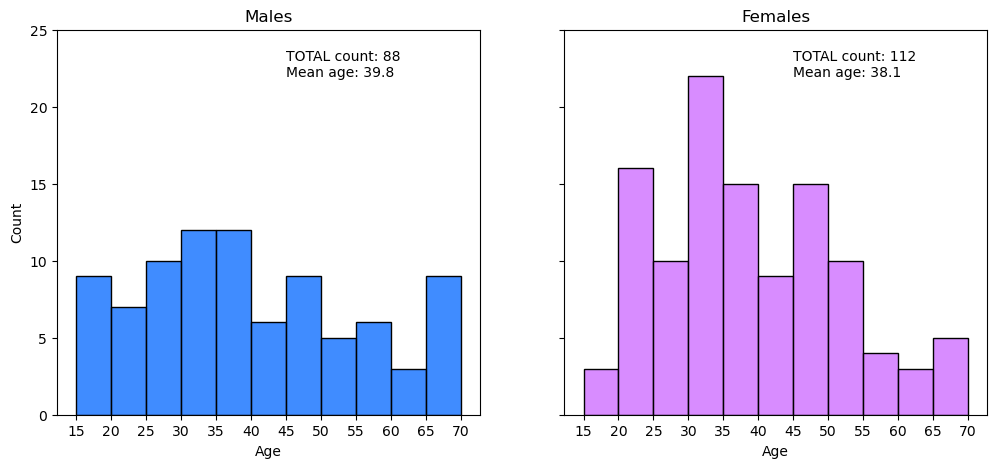

In [76]:
males_age = mall_data[mall_data['Genre']=='Male']['Age'] # subset with males age
females_age = mall_data[mall_data['Genre']=='Female']['Age'] # subset with females age
males_income = mall_data[mall_data['Genre']=='Male']['Annual Income (k$)'] # subset with males age
females_income = mall_data[mall_data['Genre']=='Female']['Annual Income (k$)'] # subset with females age


age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.histplot(males_age,bins=age_bins, color='#0066ff', ax=ax1)
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.histplot(females_age, bins=age_bins,  color='#cc66ff', ax=ax2, )
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

# The code block below is performing the Kolmogorov-Smirnov (KS) test on the "males_age" and "females_age" data. It is then calculating the p-value using the ks_2samp function from the scipy.stats module where in the p-value is representing the likelihood that the two age distributions for males and females are drawn from the same underlying distribution. A low P-value indicates that the age distributions are significantly different between males and females. A low p-value typically less than 0.05 would indicate a significant difference between male and female age distributions, but in this case the p-value is quite high (0.49) indicating no significant difference.

In [77]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


# Distribution - Annual Income (k$)

The code block below is creating three visualizations related to the "Annual Income (k$)" of males and females in the "mall_data" DataFrame: Two side-by-side histograms, one for men and one for women, showing the distribution of annual earnings where the blue histogram represents Males and the purple is for the Females. The histograms below are showing the proportion of individuals with income levels (with 10 steps) and also showing us the distribution of income for each gender. A box plot comparing the distribution of annual incomes between males and females. The box plot also provides a visual representation of the median, quartiles, and potential outliers for each gender's income distribution.

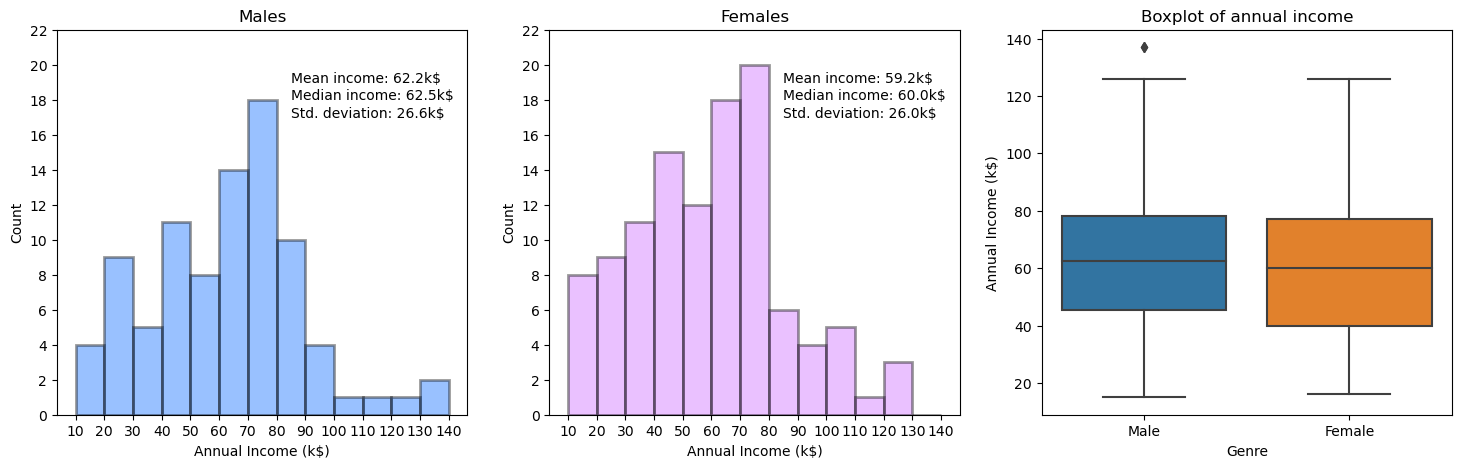

In [78]:
males_income = mall_data[mall_data['Genre']=='Male']['Annual Income (k$)'] # subset with males income
females_income = mall_data[mall_data['Genre']=='Female']['Annual Income (k$)'] # subset with females income

my_bins = range(10,150,10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Genre', y='Annual Income (k$)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

# The code below is performing the Kolmogorov-Smirnov (KS) test on the "males_income" and "females_income" data. It ia then calculating the p-value using the ks_2samp function from the scipy.stats module. The p-value represents the likelihood that the income distributions for males and females are drawn from the same underlying distribution. A lower p-value suggests that the income distributions significantly differ between males and females. A higher p-value (in this case, 0.78) suggests that the observed differences between the income distributions of males and females could be due to random chance rather than representing a significant difference in underlying income patterns. In other words, the income distributions between males and females are not significantly different based on this test.

In [79]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


# Distribution - Spending Score (1-100)

# The code block below is creating three visualizations related to the "Spending Score (1-100)" of males and females in the "mall_data" DataFrame: Two histograms are side by side, one for males and one for females, showing the distribution of spending scores. The histograms are displaying the count of individuals in different spending score bins with a step of 5 and also indicate the mean, median, and standard deviation of the spending score distributions for each gender. A box plot comparing the distribution of spending scores between males and females. The box plot also provides a visual representation of the median, quartiles, and potential outliers for each gender's spending score distribution. The box plot helps us in comparing the central tendencies and the spread of spending scores between the genders. Overall from these visualizations and statistics we can observe a comprehensive understanding of how spending scores differ between males and females in the mall dataset.

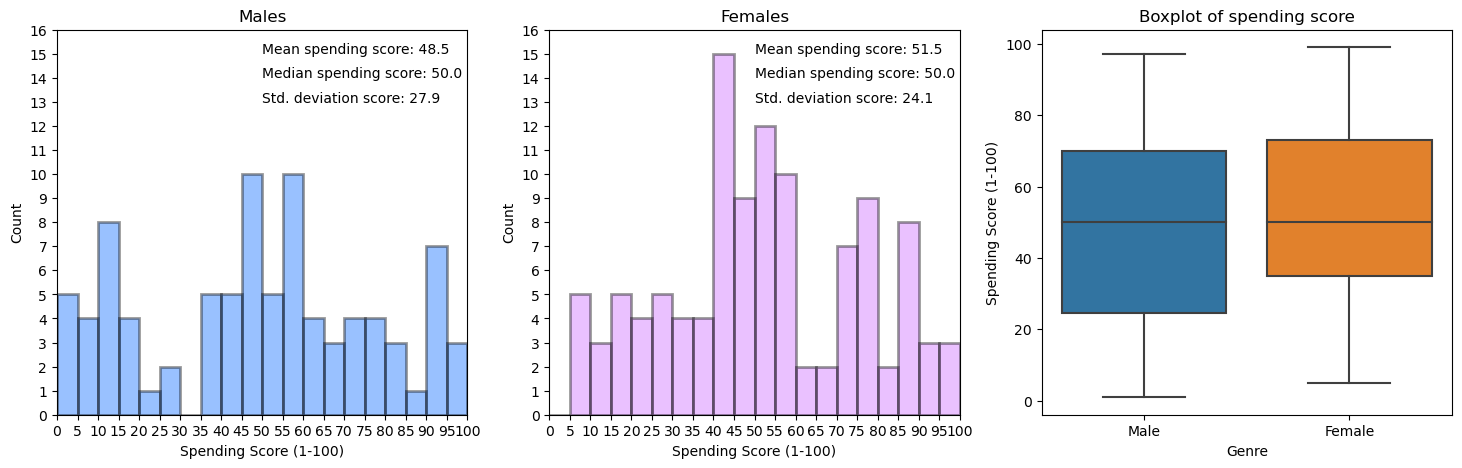

In [80]:
males_spending = mall_data[mall_data['Genre']=='Male']['Spending Score (1-100)'] # subset with males age
females_spending = mall_data[mall_data['Genre']=='Female']['Spending Score (1-100)'] # subset with females age

spending_bins = range(0,105,5)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# females histogram
sns.distplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))

# boxplot
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

plt.show()

# The code below is performing the Kolmogorov-Smirnov (KS) test on the "males_spending" and "females_spending" data. It is also calculating the p-value using the ks_2samp function from the scipy.stats module. The p-value represents the likelihood that the spending score distributions for males and females are drawn from the same underlying distribution. A lower p-value suggests that the spending score distributions significantly differ between males and females.The p-value of 0.29 suggests that there is no significant difference in spending score distributions between males and females. The observed variations in spending scores among the genders could likely be due to random chance rather than reflecting meaningful differences in spending behaviors.

In [81]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.29


# Distribution - Median Annual Income of Male and Female Customers

The code block below is performing the following actions: Here we are grouping the "mall_data" DataFrame by "Genre" (gender) and age groups based on predefined "age_bins." The Median values ​​are calculated here for each age group in each gender group and the results are stored in a "medians_by_age_group" DataFrame. Also here we are resetting the index of the "medians_by_age_group" DataFrame and renaming the grouped columns to "Genre" and "Age_group" for clarity. This results in a tabular representation of median values for different age groups within each gender category.

In [82]:
medians_by_age_group = mall_data.groupby(["Genre",pd.cut(mall_data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Genre', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

# The code below block is creating a bar plot to visualize the median annual income of male and female customers categorized into different age groups. It is using the "medians_by_age_group" DataFrame for extracting the required data. The x-axis here is representing the age groups, the y-axis is representing the median annual income (in k$), and the bars are grouped by gender (male and female) with distinct colors i.e., Purple for Female and Blue for Male. The plot below is also providing insights into the income distribution across different age groups and highlights any gender-based differences in median incomes.

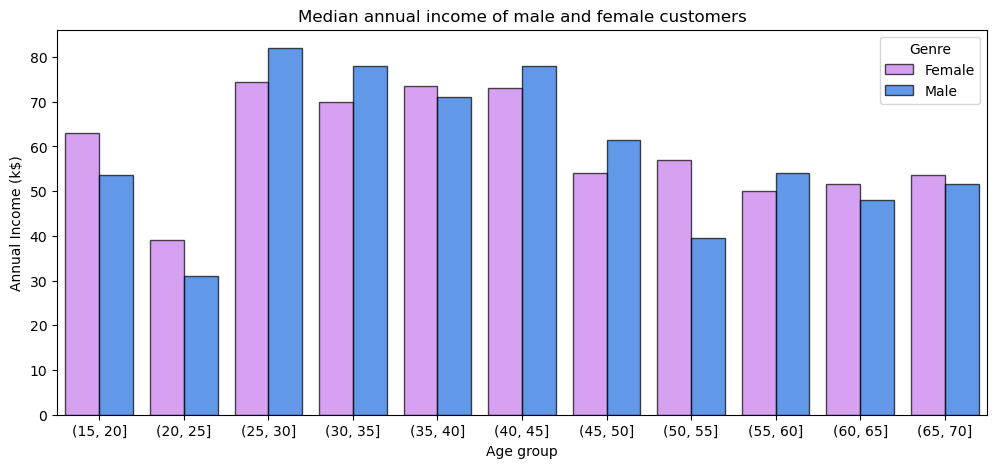

In [83]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Genre', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

# Correlations
Pearson's Correlation for Age & Spending Score (1-100) with jointplot

# The code block below is performing the following actions: It is calculating the Pearson's correlation coefficient between the "Age" and "Spending Score (1-100)" columns of the "mall_data" DataFrame using the pearsonr function from scipy.stats. It is creating a joint plot with a scatter plot of "Age" against "Spending Score (1-100)" and also including a linear regression line fit. Additionally, it overlays a contour plot (kdeplot) to show the density of data points. The calculated Pearson's correlation coefficient is displayed on the plot as well. The joint plot helps visualize the relationship between age and spending score and provides an indication of how strongly the two variables are linearly correlated. The results below provide insight into whether there is a significant relationship between age and spending score, and the direction of that relationship. A Pearson’s correlation coefficient close to 1 or -1 indicates a strong positive or negative linear correlation, respectively. When the coefficient is close to 0, it indicates a weak or no linear correlation. Contour plots help visualize the distribution of data points and identify any patterns in the relationship.

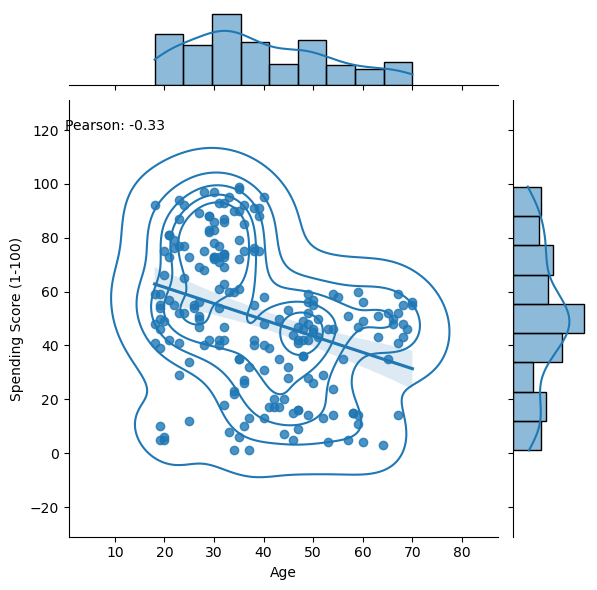

In [84]:
from scipy.stats import pearsonr

# calculating Pearson's correlation
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

jp = (sns.jointplot(data=mall_data, x = 'Age', y = 'Spending Score (1-100)',
                    kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

# Pearson's Correlation for Age & Annual Income with lineplot (Implot)

The code block is performing the following actions: It is calculating the Pearson's correlation coefficients between "Age" and "Annual Income (k$)" separately for males and females in the "mall_data" DataFrame using the pearsonr function from scipy.stats. The calculated correlation coefficients are stored in corr1 for males and corr2 for females.

It is creating an lmplot (scatter plot with a linear regression line fit) using Seaborn. The lmplot shows the relationship between "Age" and "Annual Income (k$)" in the "mall_data" DataFrame, and the data points are differentiated by color based on the "Genre" (gender) of the customers. The calculated Pearson's correlation coefficients for males and females are displayed on the plot, with the text annotations indicating the values and corresponding colors (blue for males and orange for females).
This plot helps us to visualize and compare the strength and direction of the linear relationships between age and annual income for males and females in the dataset. The text annotations on the plot display the calculated Pearson's correlation coefficients for males and females. The correlation coefficients here are representing the strength and direction of the linear relationship between age and annual income for each gender group. A positive correlation coefficient indicates that age and annual income tend to increase together, while a negative correlation coefficient indicates that they are moving in the opposite directions. A value close to 0 suggests a weak or no linear correlation.

By examining the correlation coefficients and the visual trend in the lmplot, we can assess whether there is a significant linear relationship between age and annual income for males and females and how the relationship may differ between the two genders.


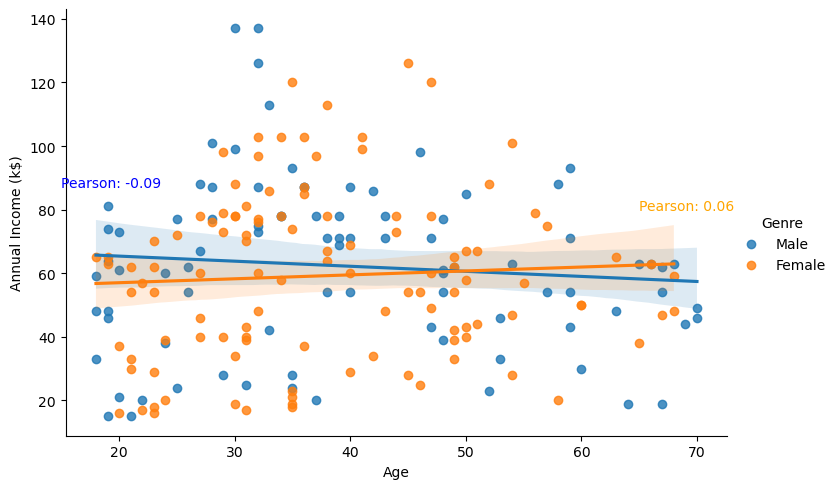

In [85]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(data=mall_data, x = 'Age', y = 'Annual Income (k$)',hue='Genre',
          aspect=1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

# Pearson's Correlation for Age & Spending Score (1-100) with line plot (Implot)

# The code block below is performing the following actions: It is calculating the Pearson's correlation coefficients between "Age" and "Spending Score (1-100)" separately for males and females in the "mall_data" DataFrame using the pearsonr function from scipy.stats. The calculated correlation coefficients are stored in corr1 for males and corr2 for females. It is also creating an lmplot (scatter plot with a linear regression line fit) using Seaborn. The lmplot shows the relationship between "Age" and "Spending Score (1-100)" in the "mall_data" DataFrame, and the data points are differentiated by color based on the "Genre" (gender) of the customers. The calculated Pearson's correlation coefficients for males and females are displayed on the plot with text annotations indicating the values and corresponding colors (blue for males and orange for females). This plot helps us to visualize and compare the strength and direction of the linear relationships between age and spending score for males and females in the dataset.  A positive correlation coefficient suggests that age and spending score tend to increase together, while a negative coefficient indicates that they tend to move in opposite directions. A value close to 0 suggests a weak or no linear correlation. The plot and annotations help us understand the correlation between age and spending score for males and females separately, and whether there are any differences in this relationship between the two genders.

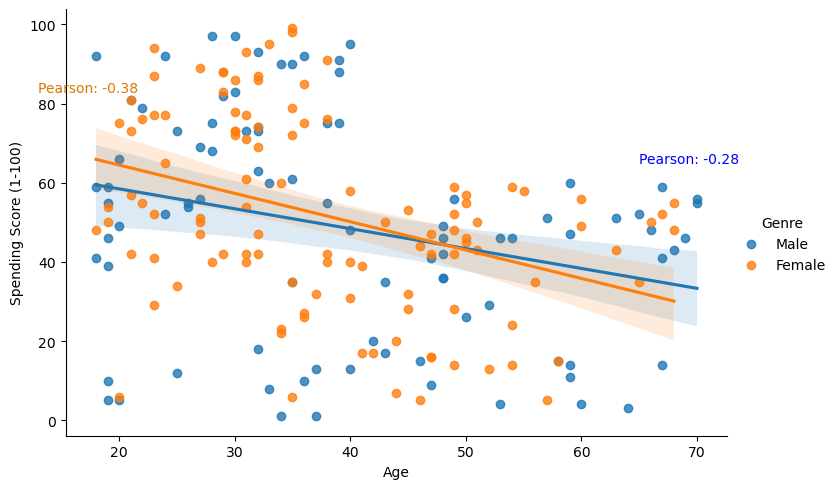

In [86]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(x='Age', y='Spending Score (1-100)', data=mall_data, hue='Genre', aspect=1.5)

plt.text(65, 65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13, 83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()



# Pearson's Correlation for Annual Income & Spending Score (1-100) with line plot (Implot)

# The below plot helps us to visualize and compare the strength and direction of the linear relationships between annual income and spending score for males and females in the dataset. The text annotations display the correlation coefficients, providing insights into how closely spending score is associated with annual income for each gender group. The below plot and annotations help us understand the correlation between annual income and spending score for males and females separately, and whether there are any differences in this relationship between the two genders.

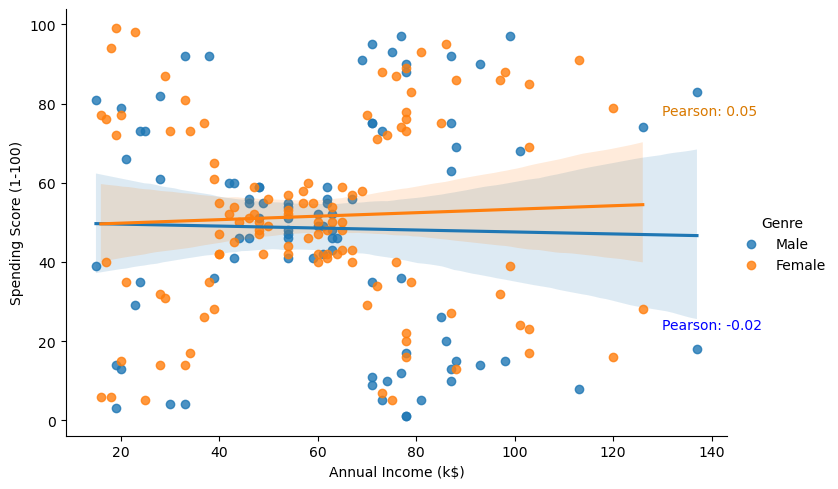

In [87]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_data, hue='Genre', aspect=1.5)

plt.text(130, 23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130, 77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()


# Clustering
K-Means

# subset with numeric variables only
The code block below here is creating a new DataFrame called "X_numerics" that contains a subset of the "mall_data" DataFrame. It is then selecting only the columns 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' from the original DataFrame, which are the numeric variables. This subset also includes the numerical data of age, annual income, and spending score, which can be used for further analysis or modeling.

In [101]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] 

# Elbow Method

The code block below is performing the following actions, it is iterating through different values of 'n_clusters', which represents the number of clusters to use in K-means clustering (2 to 10 clusters).
For each value of 'n_clusters', it applies K-means clustering to the numerical data (age, annual income, spending score) in the "X_numerics" DataFrame using the "k-means++" initialization method. It also calculates and stores the inertia of the clusters, which is a measure of how tightly the data points within each cluster are packed together. The inertia values are collected for later use in the "elbow method" to determine the optimal number of clusters. Additionally, it also calculates and stores the silhouette score, which quantifies the quality of the clustering results based on the mean distance between data points in a cluster and data points in neighboring clusters. The silhouette scores are collected for later use in evaluating clustering performance with different numbers of clusters.

In [102]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

# The code block below is creating a line plot to visualize the "Elbow method" for determining the optimal number of clusters in K-means clustering. It also plots the "clusters_inertia" values, which represents the inertia (within-cluster sum of squares) for different numbers of clusters (ranging from 2 to 10). The plot helps us to identify the "elbow point," where the inertia starts to level off. The vertical red dashed lines at cluster numbers 5 and 6 indicate potential candidate points for the optimal number of clusters. The grid and axis labels enhance the plot's readability.

The output tells us that the line plot displays the "Elbow method" for determining the optimal number of clusters in K-means clustering. The x-axis represents the number of clusters (ranging from 2 to 10), where as the y-axis represents the inertia (within-cluster sum of squares) for each corresponding number of clusters. The plot also shows how the inertia decreases as the number of clusters increases. The "Elbow point" in the plot is the point where the inertia starts to level off, forming an elbow-like shape. This point is considered the optimal number of clusters. The vertical red dashed lines at cluster numbers 5 and 6 indicate potential candidate points for the optimal number of clusters. We can choose between these points based on the specific problem and the trade-off between cluster complexity and variance captured. Overall, the plot helps us to visualize the relationship between the number of clusters and the inertia, aiding in the selection of an appropriate number of clusters for K-means clustering.

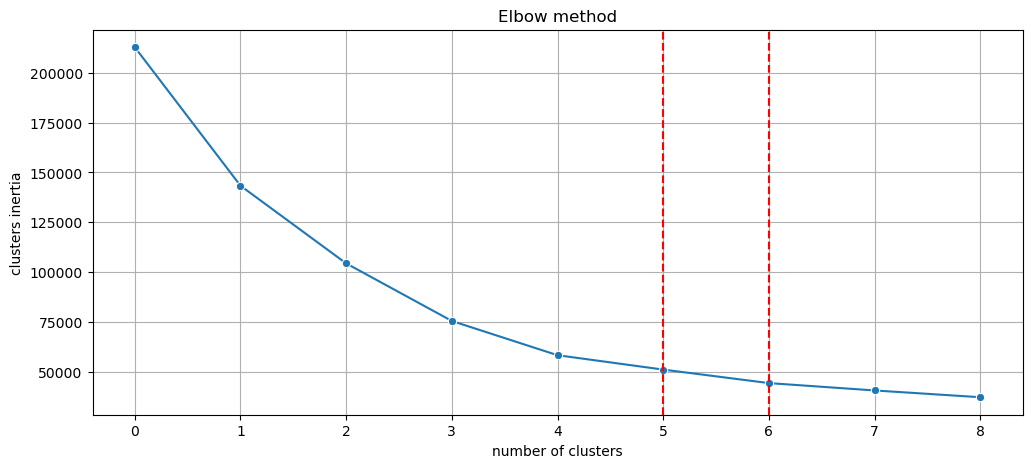

In [103]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

In K-means clustering or any other clustering algorithm, a higher silhouette score indicates better clustering performance. If there is no obvious "elbow" in the Inertia plot, the Silhouette Score can be used to determine the optimal number of clusters based on the number of clusters with the highest Silhouette Score. This provides a quantitative measure for choosing the number of clusters that gives the most well-separated and meaningful number of clusters.

# Silhouette Score Method

# The code block below is creating a line plot to visualize the "Silhouette score method" for determining the optimal number of clusters in K-means clustering. It also is plotting the Silhouette scores (s_scores) against different numbers of clusters (ranging from 2 to 10). The plot also shows us how the Silhouette scores change with the number of clusters and helps identify a potential candidate point for the optimal number of clusters based on higher Silhouette scores. The red dashed line at cluster number 6 indicates this potential point for clustering. The grid and axis labels helps us in the plot's readability easily.

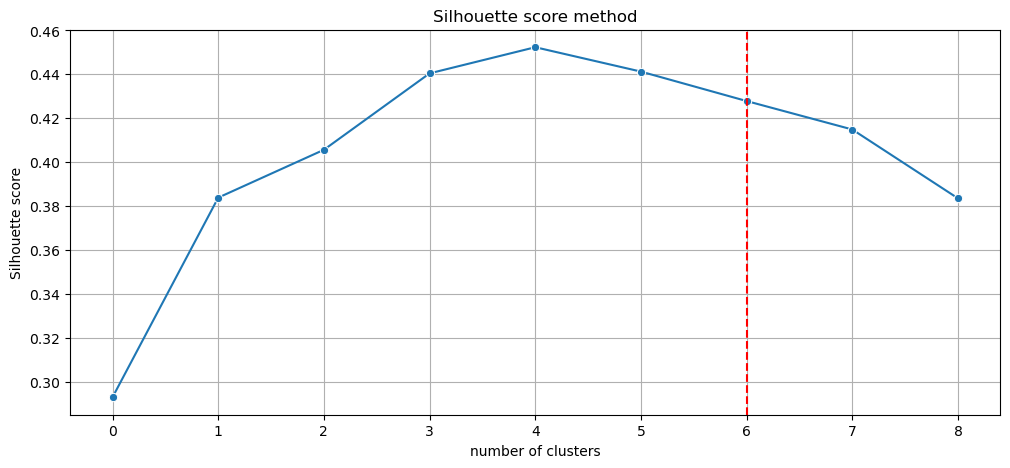

In [104]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

# 5 Clusters

The code block below is firstly initializing and fits a K-Means clustering model with 5 clusters (n_clusters=5) to the numeric features in the DataFrame X_numerics. The K-Means model is initialized using the 'k-means++' method, which is a smart initialization technique to improve convergence speed. It creates a copy of the DataFrame X_numerics called KM5_clustered and adds a new column 'Cluster' to it, containing the cluster labels assigned by the K-Means model to each data point. This allows us to associate each data point with the cluster it belongs to, making it easier to analyze and visualize the clustering results.

In [119]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

The following code will first generate a side-by-side scatter plot with two subplots, the first of which (axes[0]) displays the scatter plot of the data points from the KM5_clustered DataFrame. Each data point is defined based on the cluster label ('cluster') that has been assigned to it, and the x-axis shows annual revenue (k$) while the y-axis shows expense score (1-100). The blue squares that make up cluster centres are also shown. The second subplot (axes[1]) displays a scatter plot of data points from KM5_clustered with age as the x-axis and spending score (1-100) as the y-axis. Similar to the first subplot, each data point is coloured according to the cluster label it has been assigned ('Cluster'), and cluster centres are plotted as blue squares.


The resulting plot provides a visual representation of the clustering of the data points according to their "Annual Income (k$)," "Age," and "Spending Score (1-100)." To understand where the cluster's centroid is located in the feature space, the cluster centres are displayed as reference points. We can see from the visualisation how the data points are clustered according to their features. The K-Means algorithm creates the clusters, and the cluster centres are the centroids that each cluster's data points are clustered around. This makes it easier to comprehend how the K-Means algorithm divided the data into various groups and how the data points were distributed and separated within the given feature spaces.

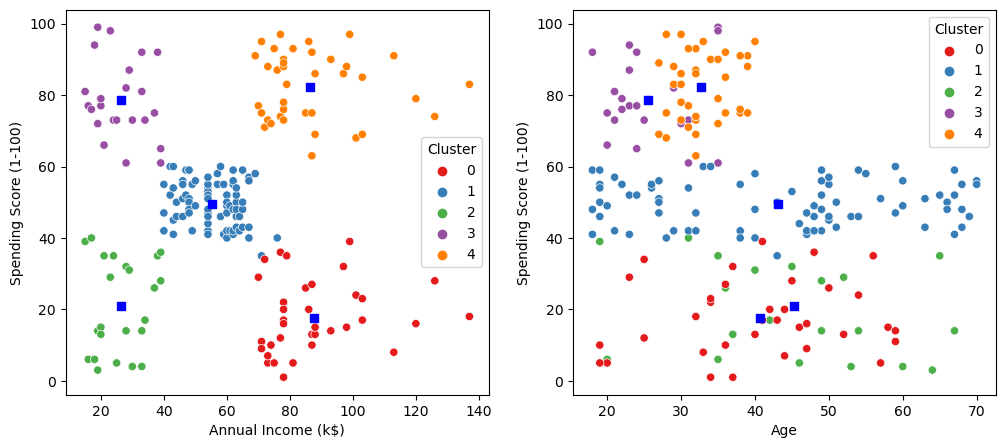

In [120]:
fig1, (axes) = plt.subplots(1, 2, figsize=(12, 5))

scat_1 = sns.scatterplot(data=KM5_clustered, x='Annual Income (k$)', y='Spending Score (1-100)',
                         hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(data=KM5_clustered, x='Age', y='Spending Score (1-100)',
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:, 1], KM_5_clusters.cluster_centers_[:, 2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:, 0], KM_5_clusters.cluster_centers_[:, 2], marker='s', s=40, c="blue")
plt.show()

# Size of clusters
Based on the cluster labels assigned by the K-Means algorithm, which are represented in the 'Cluster' column of the KM5_clustered DataFrame, the data is grouped.
with the use of the groupby method and the size function, the size (number of data points) of each cluster is determined. The outcome is a DataFrame KM_clust_sizes with a column called "KM_size" and the corresponding cluster sizes in a column with the cluster labels as the index.
In order to more accurately describe the size of each cluster, it finally renames the column to "KM_size" and prints the DataFrame KM_clust_sizes, which displays the number of data points in each K-Means cluster. After the execution of the below code, we can see the size as shown in the below output.

In [121]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
print(KM_clust_sizes)

         KM_size
Cluster         
0             36
1             79
2             23
3             23
4             39


# Create a 3D projection of 5 generated clusters.
The code block below generates a 3D scatter plot using the 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' features as the three axes to visualise the data points of the KM5_clustered DataFrame in 3D space. The cluster centres are represented by various colours, and each data point is coloured according to the cluster label that it has been assigned. The plot gives an understanding of how the K-Means algorithm clustered the data into five different groups and facilitates observation of the distribution and separation of data points in 3D space.
Here the Axes3D constructor does not accept the rect, elev, and azim parameters so we are using the view_init() method to set the elevation and azimuth angles for the 3D view.

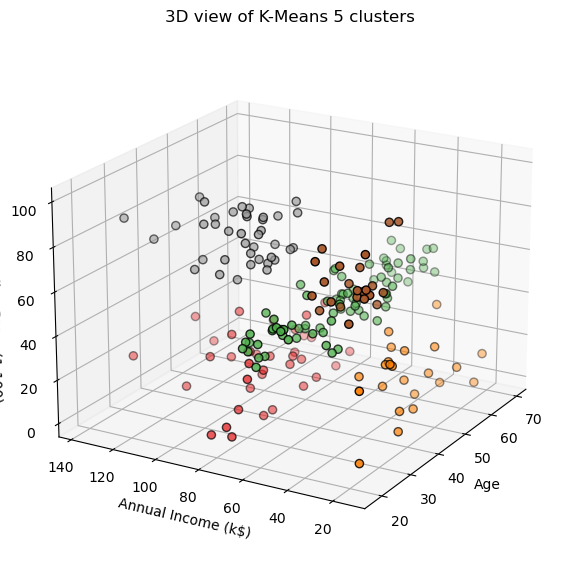

In [133]:
#Create a 3D projection of 5 generated clusters.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(KM5_clustered['Age'],
           KM5_clustered['Annual Income (k$)'],
           KM5_clustered['Spending Score (1-100)'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')

# Set the elevation and azimuth angles directly
ax.elev = 20
ax.azim = 210

plt.show()

# 6 Clusters

The dataset X_numerics, which contains the numeric features "Age," "Annual Income (k$)," and "Spending Score (1-100)," is being clustered using K-Means with six clusters by the code below. Based on their similarities, the data points are divided into 6 clusters using the K-Means algorithm, and the cluster labels are added to the DataFrame KM6_clustered.

In [136]:
# initialise and fit K-Means model
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) 

KM6_clustered = X_numerics.copy()
# append labels to points
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ 

Two scatter plots are placed side by side in the subplot made by the code above as shown in the below output images. The left plot displays the six clusters created by K-Means using the features "Annual Income (k$)" and "Spending Score (1-100)". The centroids of the clusters are displayed as blue squares, and each point is coloured according to its cluster assignment. The right plot displays the six clusters created by K-Means using the features "Age" and "Spending Score (1-100)". Once more, the colour of each point is determined by which cluster it belongs to, and the centroids of the clusters are displayed as blue squares.

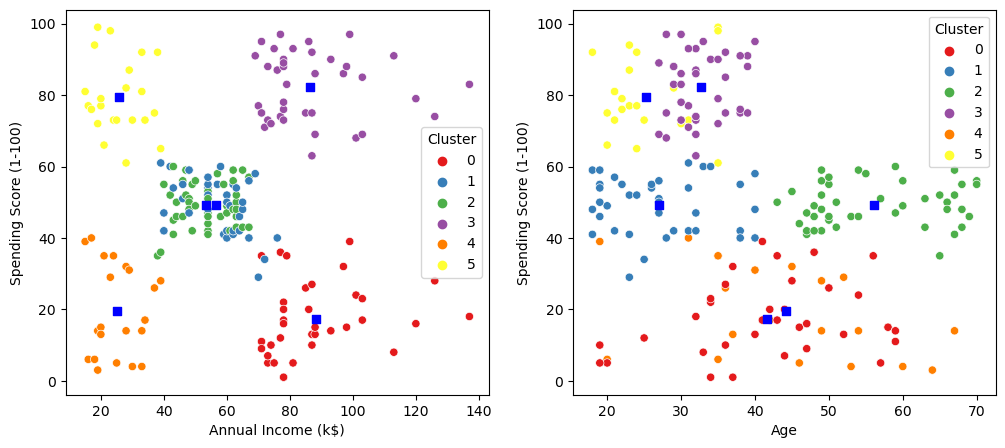

In [116]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(data=KM6_clustered, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(data=KM6_clustered, x='Age', y='Spending Score (1-100)',
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

# Size of Clusters
By using K-Means with six clusters, the code below calculates the size of each cluster and stores the results in a DataFrame called KM6_clust_sizes. The 'Cluster' column is used to cluster the data in the KM6_clustered DataFrame, and the size() function is used to determine how big each cluster is. The cluster labels serve as the index in the resulting DataFrame KM6_clust_sizes, which also includes the corresponding cluster sizes in the "KM_size" column.


In [137]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,45
1,38
2,22
3,39
4,35
5,21


#  Create an interactive 3D view of K-Means with 6 clusters with Plotly
The code below creates a function tracer that uses the KM6_clustered DataFrame to produce a 3D scatter plot trace for a specific cluster. Each cluster is given a unique scatter plot trace, with the age, spending score, and annual income acting as the x, y, and z axes, respectively. Each cluster's data is kept in a separate trace object. With the data and layout configuration, it next uses Plotly to create an interactive 3D plot, displaying each cluster with a distinct colour and name.


In [138]:
def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )
trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

# create a matrix of investigated combinations.
For the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm, the below code mentioned generates a matrix of combinations for analysing various parameter values. It specifies a set of minimum sample sizes (min_samples) and an epsilon range (eps_values) to be used as DBSCAN's input parameters. It then generates every possible combination of epsilon and minimum samples using the product function from the itertools module, resulting in a list of tuples that contains each possible combination of eps_values and min_samples.

In [152]:
eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

# collecting number of generated clusters
The below code performs DBSCAN clustering on the dataset X_numerics for each combination of epsilon (eps) and minimum samples (min_samples) in the DBSCAN_params matrix. It also determines the number of clusters generated for each combination and the silhouette score of the clustering outcome. Finding the distinctive labels that DBSCAN assigned yields the number of generated clusters. The silhouette score is computed to assess the clustering quality. For further analysis, the outcomes are kept in the no_of_clusters and sil_score lists, respectively.

In [153]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

# Heatmaps

# The heatplot illustrates how many clusters were generated by the algorithm with the respective parameters combinations 
#created above. You can see there are clusters from 17 to 4. 
The below code generates a heatmap that shows the number of clusters produced by the DBSCAN algorithm with the appropriate pairings of epsilon (Eps) and minimum samples (Min_samples) from the DBSCAN_params matrix. The combinations and the number of clusters generated for each combination are stored in the tmp DataFrame, and the data is then organised using a pivot table (pivot_1). The heatmap shows the epsilon values on the x-axis and the min_samples value for the number of clusters, with the intensity of the colour representing the number of clusters produced for each combination. This visual aid makes it easier to comprehend how different parameter settings affect how many clusters the DBSCAN algorithm can identify.

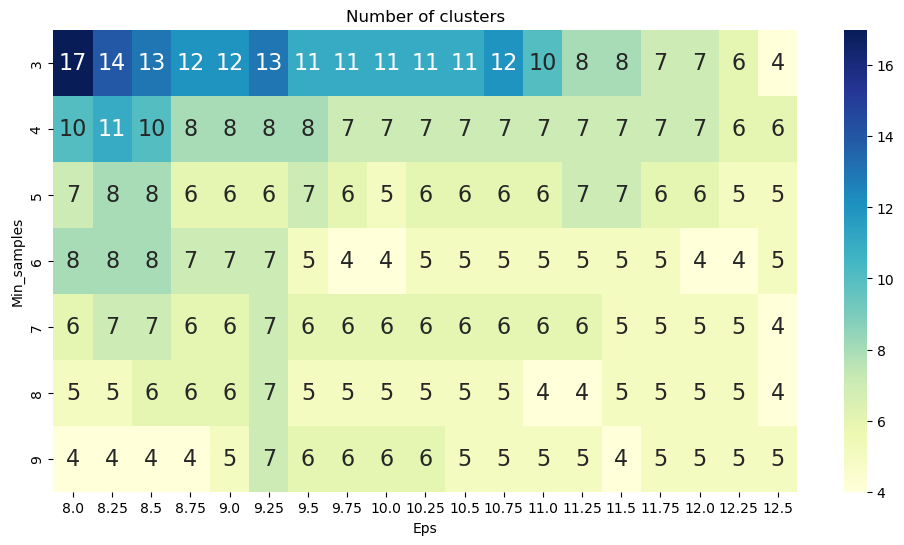

In [154]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

# In the heatmap below, we see the Global maximum is 0.26 for eps=12.5 and min_samples=4.
The code below generates a second heatmap that displays the silhouette scores produced by the DBSCAN algorithm using various combinations of the epsilon (Eps) and minimum samples (Min_samples) from the DBSCAN_params matrix. The combinations and the silhouette scores for each combination are stored in the tmp DataFrame, and the data is then organised using a pivot table (pivot_1). With the epsilon values on the x-axis and the silhouette scores on the y-axis of the heatmap, each combination's silhouette score is indicated by the intensity of the colour. 
The graphical representation makes it easier for us to spot the parameter settings that produce higher silhouette scores, which indicate better clustering performance. With these parameters: epsilon=12.5, min_samples=4, and the global maximum silhouette score of 0.26.

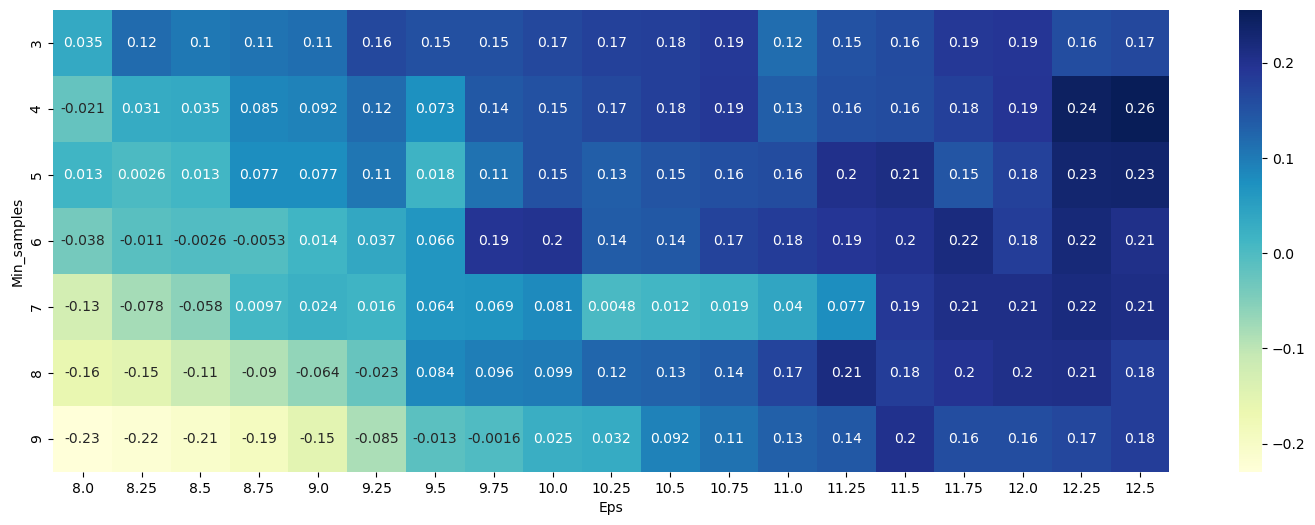

In [142]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

#  Let's use the Global maximum settings (eps = 12.5 and min_samples = 4)
The DBSCAN algorithm is used in the code below to cluster the numerical features (X_numerics) using an epsilon (eps) value of 12.5 and a minimum sample size (min_samples) value of 4. A copy of X_numerics is used to create the DBSCAN_clustered DataFrame, and a new column called "Cluster" is added to the DBSCAN_clustered DataFrame with the cluster labels obtained from the DBSCAN algorithm. Along with the cluster labels that the DBSCAN algorithm assigned to each data point, this DataFrame now includes the original numerical features.

In [156]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

# Clusters sizes

The below code determines the size of each cluster produced by the DBSCAN algorithm and stores the results in the DataFrame called DBSCAN_clust_sizes. The DataFrame has two columns: "Cluster" (which represents the labels of the clusters) and "DBSCAN_size" (which indicates how many observations are contained in each cluster). The size of the outlier cluster, which is represented by the label "-1" in the "Cluster" column, reveals how many outliers the DBSCAN algorithm found (18 in this case).

In [157]:
# Witht the following code, you will see that 5 clusters are created AND one outlier cluster (-1) was created. 
#  You can also see that the size of clusters vary greatly and some only have a few observations.
#  Lastly, you see there are 18 outliers (-1).
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


The code below creates two scatter plots to show the clusters generated by the DBSCAN algorithm. Clusters based on the attributes "annual income (k$)" and "spend score (1-100)" are shown in the first plot, while clusters based on the attributes "age" and "spend score (1-100)" are shown in the second plot and do not meet the sampling criteria noe with other colors indicate data points that are part of known clusters. The plot's points each represent a data point, and the colour of each point identifies the cluster to which it belongs. The plot also shows how data points are grouped based on their "annual income (k$)" and "spend score (1-100)" attributes in the first plot, and "age" and "spend score (1-100)" in the second plot Black dots in the plots represent outlying points that do not belong to any group. The legend in each story provides information about group characters.

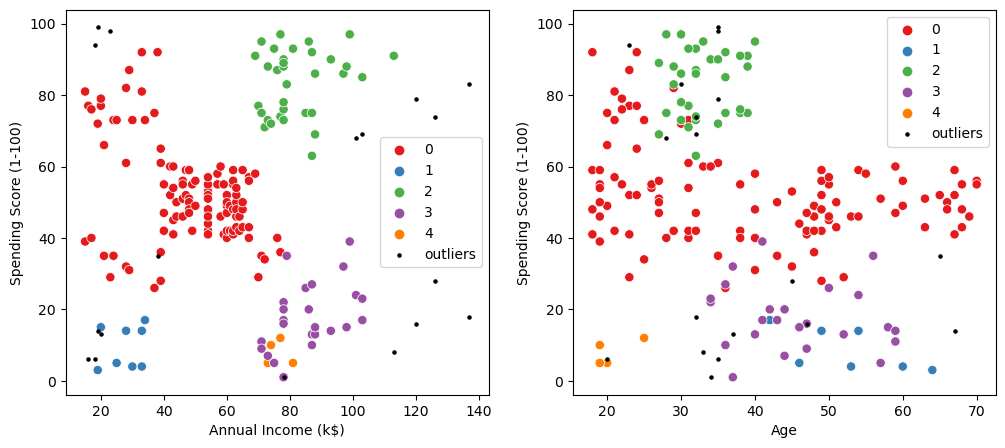

In [158]:
# With this code, you will see that there are some outliers (small black dots).  
#These points do not meet distance and minimum samples requirements to be recognized as a cluster.

outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1], x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1], x = 'Age', y = 'Spending Score (1-100)',
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()


# Compare Algorithms

# K-Means with K=5
The code below when looked at, consists of figures with two side-by-side subplots, showing the results of K-Means clustering with K=5 on the data set. The left subplot shows data points colored by their group function for the attributes "Annual Revenue (k$)" and "Cost (1-100)", and the right subplot shows data points colored by their group function for the attributes "Age" and "Cost Score (1-100)".

The results plot the clustered data points using K-Means with K=5, showing how the points are divided into five clusters based on identified attributes In each subsection, the blue rectangle represents the cluster midpoint, which is the point of each cluster.

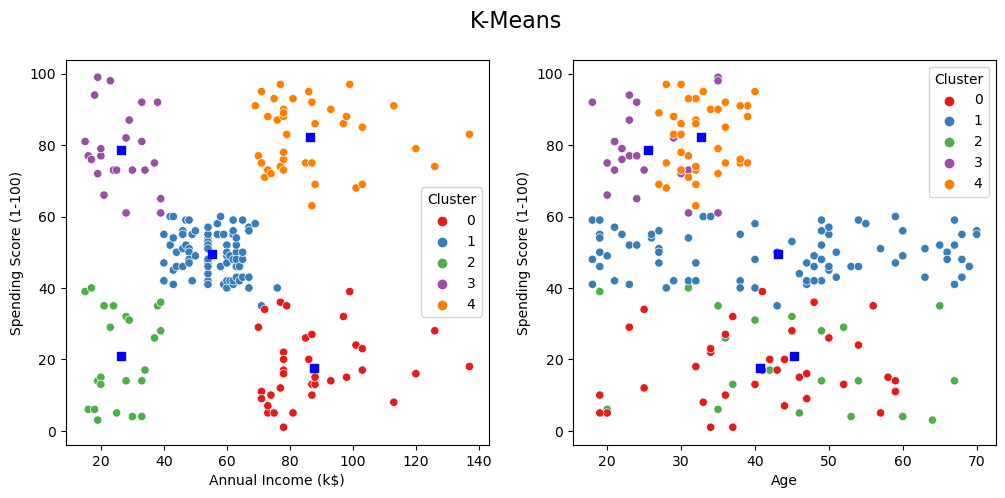

In [159]:
fig1.suptitle('K-Means', fontsize=16)
fig1

# K-Means with K=6
The code below is generating a visualization comparing the results of the K-Means clustering algorithm with K=6. It also shows two subplots side by side: one for the scatter plot of the data points colored by their respective clusters, and the other for the centroids of the clusters (shown as blue squares). The "fig11" variable contains the figure object representing the visualization. The "suptitle" function adds a centered title to the entire figure. From the below figures, The first subplot (left) is a scatter plot with data points based on their "annual income (k$)" and "expenditure score (1-100)" values. The second subplot (right) is also a scatter plot, in which the data points are labeled by their "Age" and "Spending Score (1-100)" values ​​Like the first subplot, each data point is colored by its cluster label, and the cluster's centroid is represented by a blue triangle.



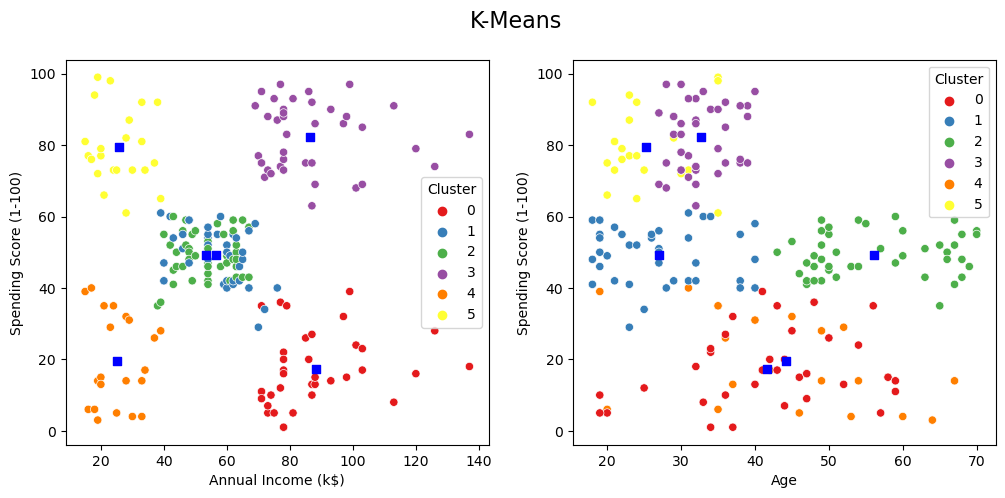

In [147]:
fig11.suptitle('K-Means', fontsize=16)
fig11

# DBSCAN with 5 clusters AND outliers
The results displayed by the code are comparisons of DBSCAN clustering results with 5 clusters, including outliers.

The first subplot (left) is a scatter plot in which data points are based on their "annual income (k$)" and "expenditure score (1-100)" values ​​and each data point is colored according to its assigned group label.

The second subplot (right) is also a scatter plot, plotting the data points based on their "Age" and "Spending Score (1-100)" values ​​Like the first subplot, each data point is colored by its cluster label, and the small black lines represent outliers.

The title "DBSCAN" appears above the subplots, indicating that the visualization is mainly concerned with the DBSCAN clustering algorithm with 5 clusters and outliers

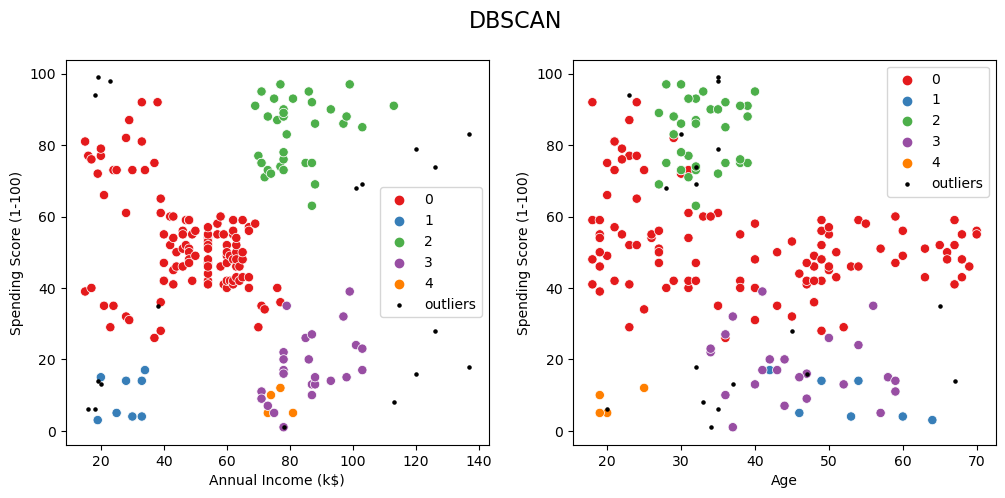

In [160]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

The code below creates a single DataFrame called "clusters" from the cluster size data from two different clustering algorithms, K-Means with 6 clusters (KM6_clust_sizes) and DBSCAN (DBSCAN_clust_sizes). The resulting DataFrame will show the cluster sizes of the two algorithms side by side, allowing for an automatic comparison and generation of cl Star sizes in the analysis.

In [149]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes],axis=1, sort=False)
clusters

,KM_size,DBSCAN_size
Cluster,,
0,45.0,112.0
1,38.0,8.0
2,22.0,34.0
3,39.0,24.0
4,35.0,4.0
5,21.0,NaN
-1,NaN,18.0


The code outputs the outliers that the DBSCAN clustering algorithm identified. The "DBSCAN_clustered" DataFrame is filtered to only display the data points that were given the cluster label -1, which denotes outliers according to the DBSCAN algorithm. These data points are thought of as noise or outliers in the data because they do not belong to any specific group.

In [161]:
#  Print the outliers
print(DBSCAN_clustered[DBS_clustering.labels_==-1])

     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
2     20                  16                       6       -1
6     35                  18                       6       -1
7     23                  18                      94       -1
10    67                  19                      14       -1
11    35                  19                      99       -1
14    37                  20                      13       -1
19    35                  23                      98       -1
40    65                  38                      35       -1
158   34                  78                       1       -1
187   28                 101                      68       -1
191   32                 103                      69       -1
192   33                 113                       8       -1
194   47                 120                      16       -1
195   35                 120                      79       -1
196   45                 126                      28       -1
197   32